# Visualize module topology

In [24]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from config import PIPELINE_RUN_DIR, AMIMS, NETWORKS, SEED_SETS
from functions import split_module_id, load_module_topology, load_seed_stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
amim_meta_df = pd.DataFrame.from_dict(AMIMS)
network_meta_df = pd.DataFrame.from_dict(NETWORKS)
seed_meta_df = pd.DataFrame.from_dict(SEED_SETS)

df = load_module_topology()
seeds_df = load_seed_stats()
df

,sample,nodes,edges,seeds,max_dist_to_seed,diameter,components,largest_component,isolated_nodes,added_nodes,seed_id,network_id,amim_id,network,amim
0,ALS.biogrid.4_4_242_homo_sapiens.Symbol.no_tool,111,279,111,0.0,5.0,22,88,19,0,ALS,biogrid.4_4_242_homo_sapiens.Symbol,no_tool,BioGRID,Only seeds
1,ALS.nedrex.reviewed_proteins_exp.Symbol.domino,89,142,48,1.0,13.0,1,89,0,41,ALS,nedrex.reviewed_proteins_exp.Symbol,domino,NeDRex,DOMINO
2,LUAD.string.human_links_v12_0_min700.Symbol.ro...,715,1577,261,3.0,13.0,1,715,0,454,LUAD,string.human_links_v12_0_min700.Symbol,robust_bias_aware,STRING (high confidence),ROBUST\n(bias aware)
3,UC.hippie.v2_3_high_confidence.Symbol.diamond,268,1041,68,3.0,8.0,35,232,32,200,UC,hippie.v2_3_high_confidence.Symbol,diamond,HIPPIE (high confidence),DIAMOnD
4,ALS.nedrex.reviewed_proteins_exp.Symbol.no_tool,111,298,111,0.0,6.0,17,94,15,0,ALS,nedrex.reviewed_proteins_exp.Symbol,no_tool,NeDRex,Only seeds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,HD.nedrex.reviewed_proteins_exp.Symbol.diamond,238,5317,38,2.0,6.0,9,230,8,200,HD,nedrex.reviewed_proteins_exp.Symbol,diamond,NeDRex,DIAMOnD
346,ALS.string.human_physical_links_v12_0_min700.S...,1082,8579,91,2.0,12.0,1,1082,0,991,ALS,string.human_physical_links_v12_0_min700.Symbol,rwr,"STRING (physical, high confidence)",RWR
347,ALS.hippie.v2_3_medium_confidence.Symbol.first...,7612,452038,106,1.0,5.0,1,7612,0,7506,ALS,hippie.v2_3_medium_confidence.Symbol,firstneighbor,HIPPIE (medium confidence),1st Neighbors
348,ALS.string.human_links_v12_0_min900.Symbol.fir...,1674,15331,103,1.0,10.0,3,1667,0,1571,ALS,string.human_links_v12_0_min900.Symbol,firstneighbor,STRING (highest confidence),1st Neighbors


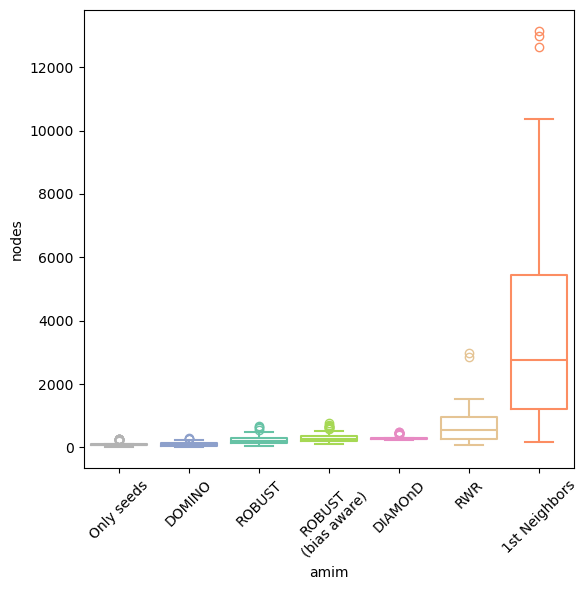

In [26]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y="nodes", hue="amim", x="amim", fill=False, palette=dict(zip(amim_meta_df.label, amim_meta_df.color)), order=amim_meta_df.label)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


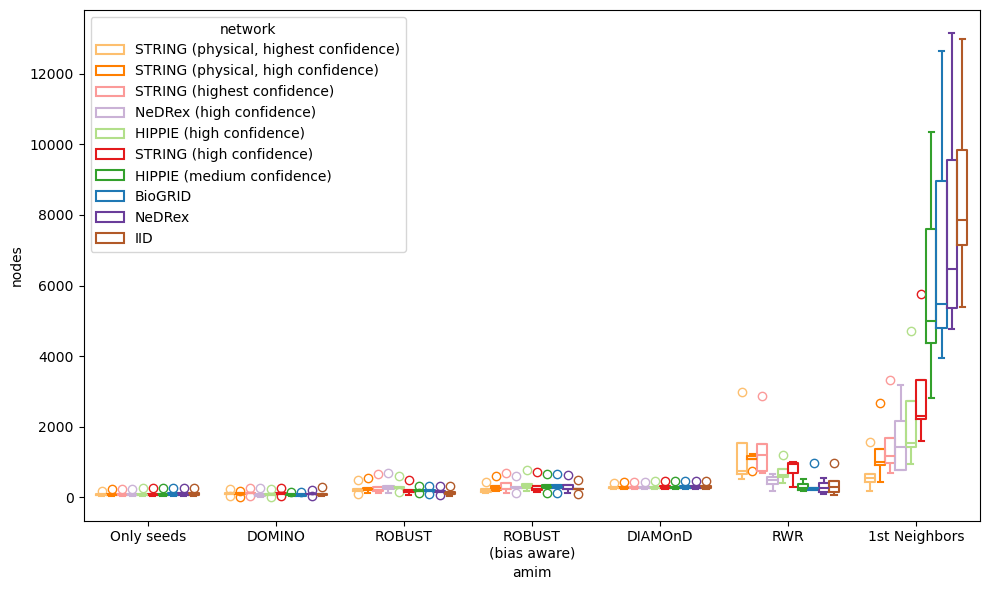

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y="nodes", hue="network", x="amim", fill=False, palette=dict(zip(network_meta_df.label, network_meta_df.color)), hue_order=network_meta_df.label, order=amim_meta_df.label)
plt.tight_layout()
plt.show()

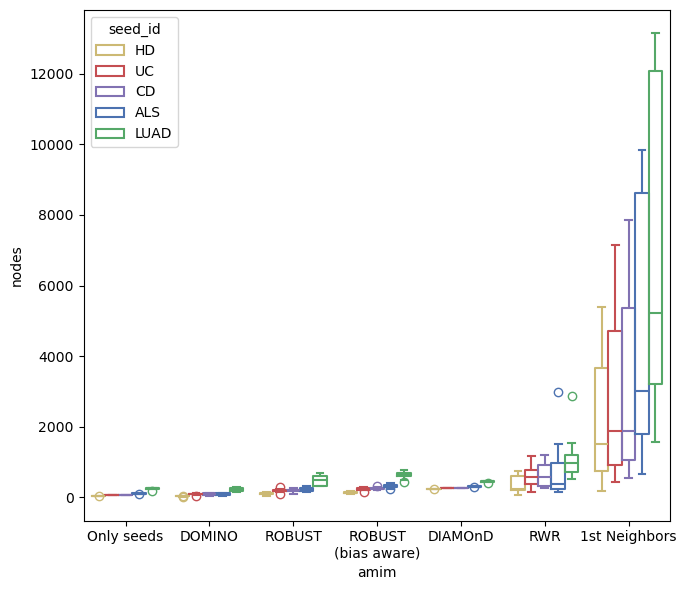

In [28]:
plt.figure(figsize=(7, 6))
sns.boxplot(data=df, y="nodes", hue="seed_id", x="amim", fill=False, palette=dict(zip(seed_meta_df.short, seed_meta_df.color)), hue_order=seed_meta_df.short, order=amim_meta_df.label)
plt.tight_layout()
plt.show()

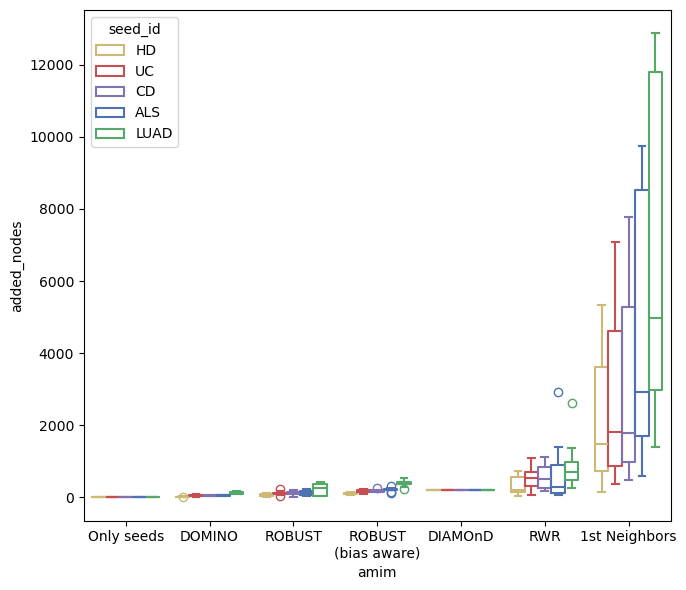

In [29]:
plt.figure(figsize=(7, 6))
sns.boxplot(data=df, y="added_nodes", hue="seed_id", x="amim", fill=False, palette=dict(zip(seed_meta_df.short, seed_meta_df.color)), hue_order=seed_meta_df.short, order=amim_meta_df.label)
plt.tight_layout()
plt.show()

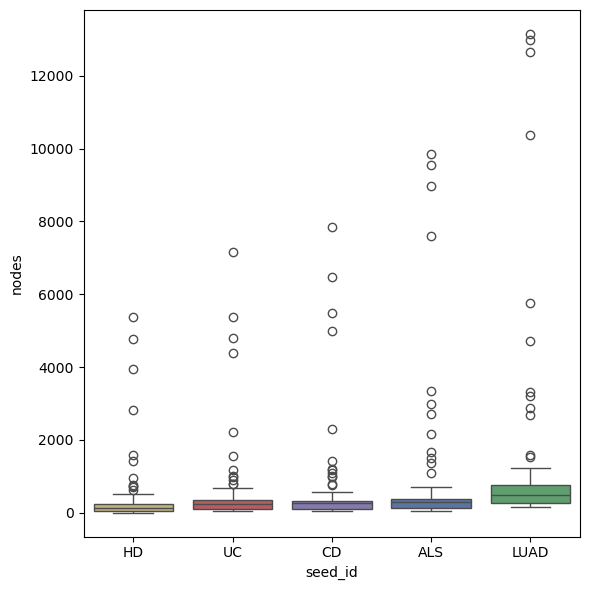

In [30]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y="nodes", hue="seed_id", x="seed_id", palette=dict(zip(seed_meta_df.short, seed_meta_df.color)), order=seed_meta_df.short)
plt.tight_layout()
plt.show()

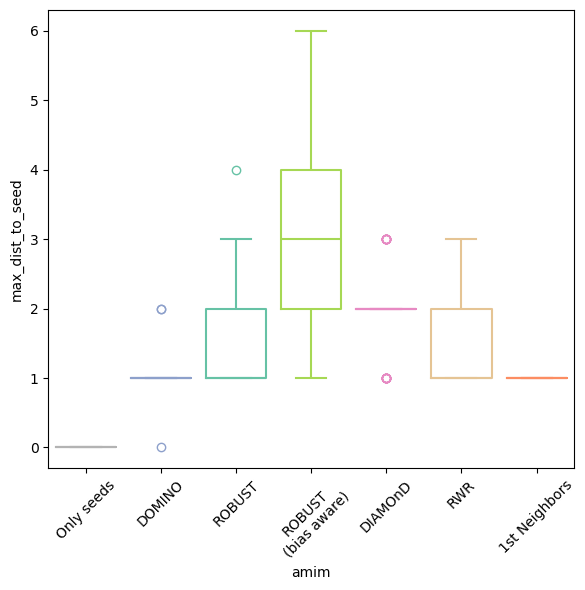

In [31]:
# TODO: maybe as heatmap?
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y="max_dist_to_seed", hue="amim", x="amim", palette=dict(zip(amim_meta_df.label, amim_meta_df.color)), order=amim_meta_df.label, fill=False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

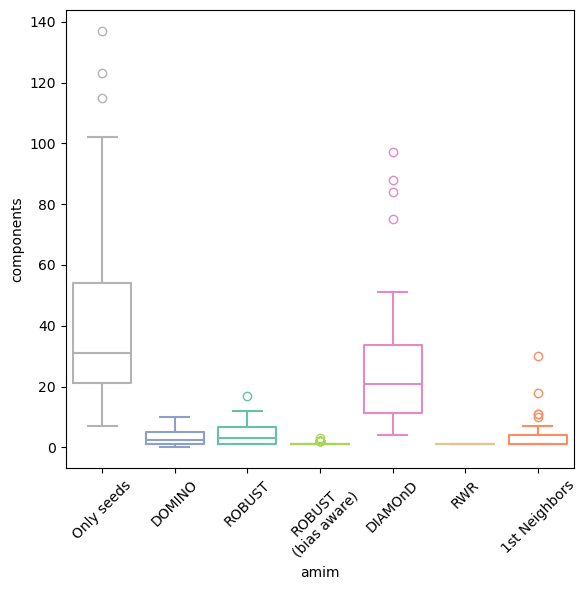

In [32]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y="components", hue="amim", x="amim", fill=False, palette=dict(zip(amim_meta_df.label, amim_meta_df.color)), order=amim_meta_df.label)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

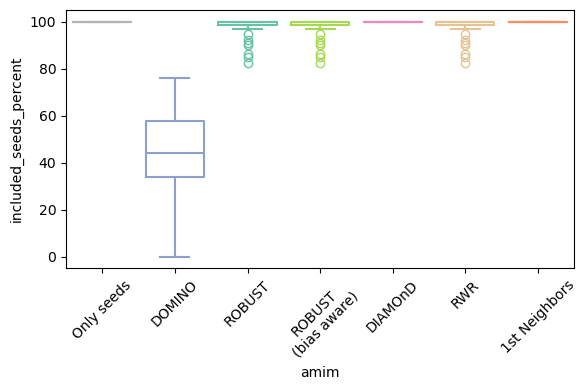

In [33]:
df_merged = df.merge(seeds_df, on=["seed_id", "network_id"])

# 'seeds' is the number of seeds in the module, 'Seeds' is the number of seeds in network
df_merged["dropped_seeds"] = df_merged.Seeds - df_merged.seeds
df_merged["included_seeds_percent"] = df_merged.seeds / df_merged.Seeds * 100

plt.figure(figsize=(6, 4))
sns.boxplot(data=df_merged, y="included_seeds_percent", hue="amim", x="amim", fill=False, palette=dict(zip(amim_meta_df.label, amim_meta_df.color)), order=amim_meta_df.label)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()